In [62]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [63]:
df = pd.read_csv(r"C:\Users\asus\Desktop\MaunaLoaDailyTemps.csv")

In [64]:
df.head(20)

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
5,1/6/2014,22.0,39.0,31.0,658,1759
6,1/7/2014,28.0,45.0,37.0,658,1759
7,1/8/2014,30.0,41.0,36.0,659,1800
8,1/9/2014,29.0,42.0,36.0,659,1801
9,1/10/2014,30.0,47.0,39.0,659,1801


In [69]:
df['DATE'] = pd.to_datetime(df['DATE'])


In [65]:
df.drop(columns = ["MinTemp", "MaxTemp","Sunrise", "Sunset"], inplace = True)

In [66]:
mean = df["AvgTemp"].mean()
df.fillna(value=mean, inplace = True)

In [7]:
# SMA over a period of 10 days and 20 days
df["SMA10"] = df.AvgTemp.rolling(10, min_periods=1).mean()
df["SMA20"] = df.AvgTemp.rolling(20, min_periods=1).mean()

In [8]:
df

,DATE,AvgTemp,SMA10,SMA20
0,1/1/2014,40.0,40.000000,40.000000
1,1/2/2014,43.0,41.500000,41.500000
2,1/3/2014,41.0,41.333333,41.333333
3,1/4/2014,37.0,40.250000,40.250000
4,1/5/2014,31.0,38.400000,38.400000
...,...,...,...,...
1820,12/26/2018,40.0,45.400000,45.750000
1821,12/27/2018,39.0,44.200000,45.450000
1822,12/28/2018,40.0,43.900000,45.250000
1823,12/29/2018,42.0,43.900000,45.100000


# PLOT
* AVG TEMP = GREEN
* 10SMA = RED
* 20 SMA = YELLOW

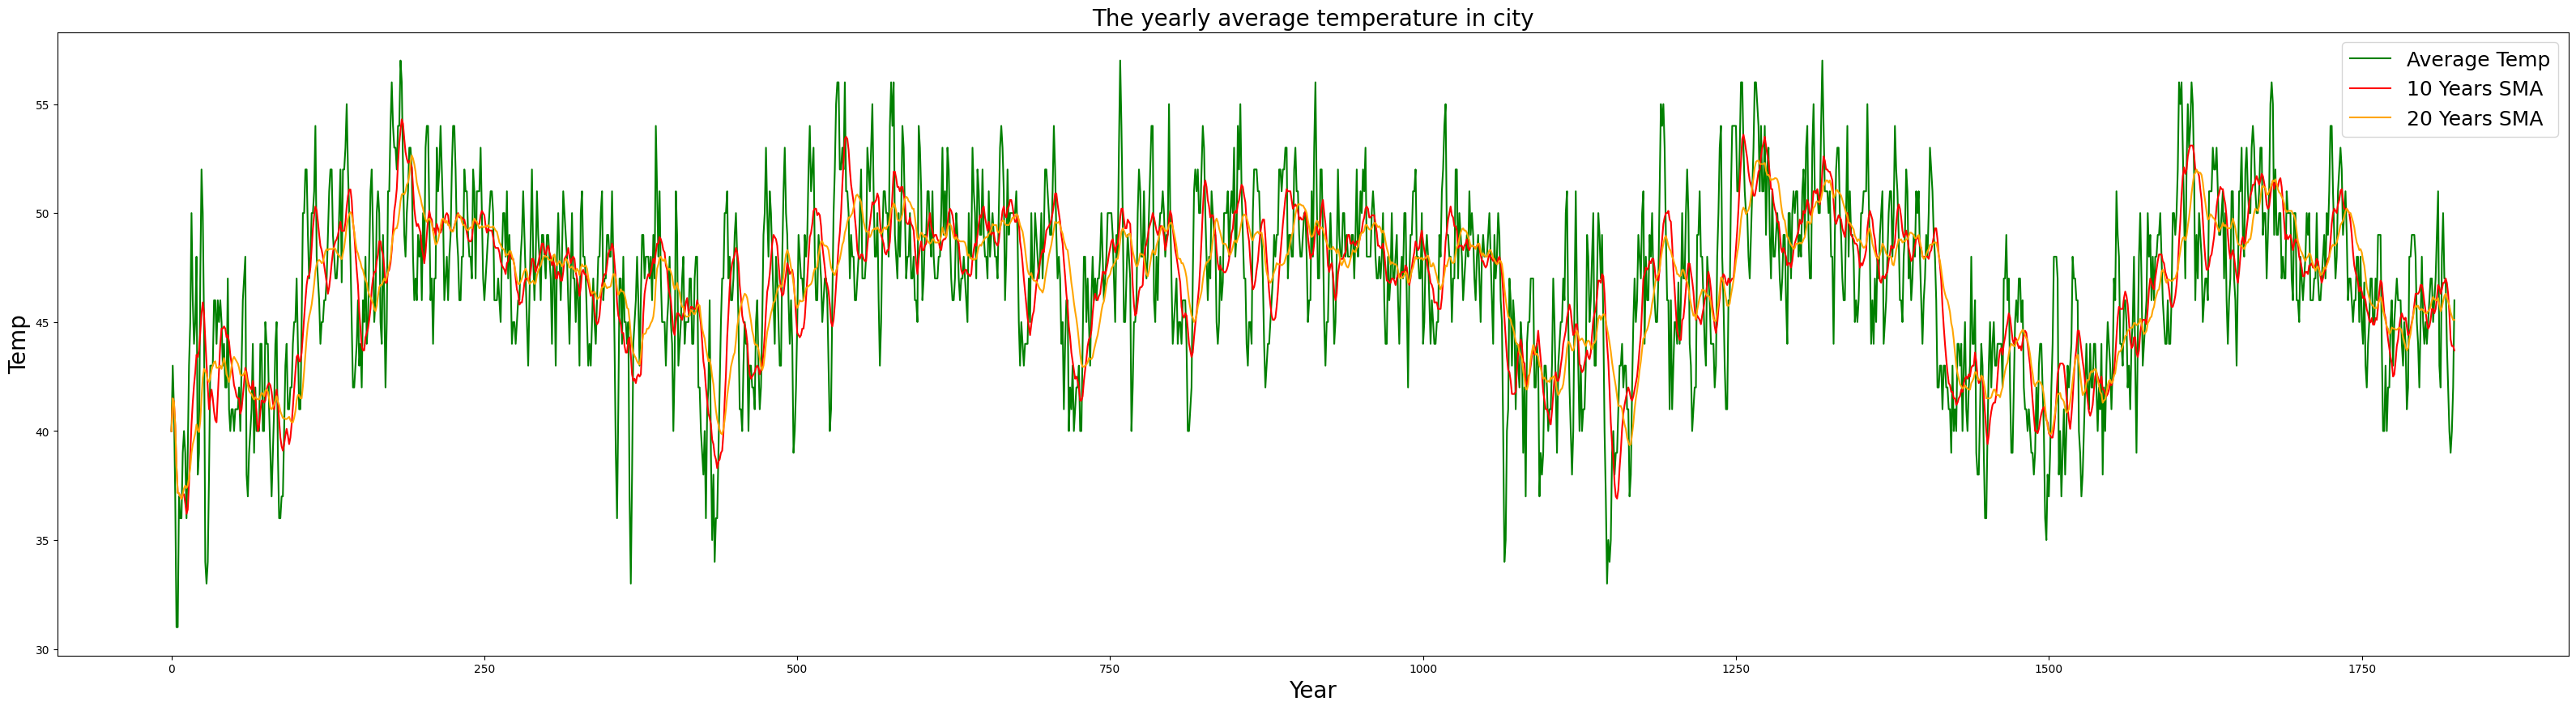

In [23]:
colors = ['green', 'red', 'orange']
# Line plot 
df.plot(color=colors, figsize = (40, 10))
plt.legend(labels = ["Average Temp", "10 Years SMA", "20 Years SMA"], fontsize = 18)
plt.title("The yearly average temperature in city", fontsize = 20)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Temp", fontsize = 20)
plt.show()

# Cumulative Moving Average (CMA)
## The CMA is the unweighted mean of past values till the current time.

In [25]:
df["CMA"] = df.AvgTemp.expanding().mean()

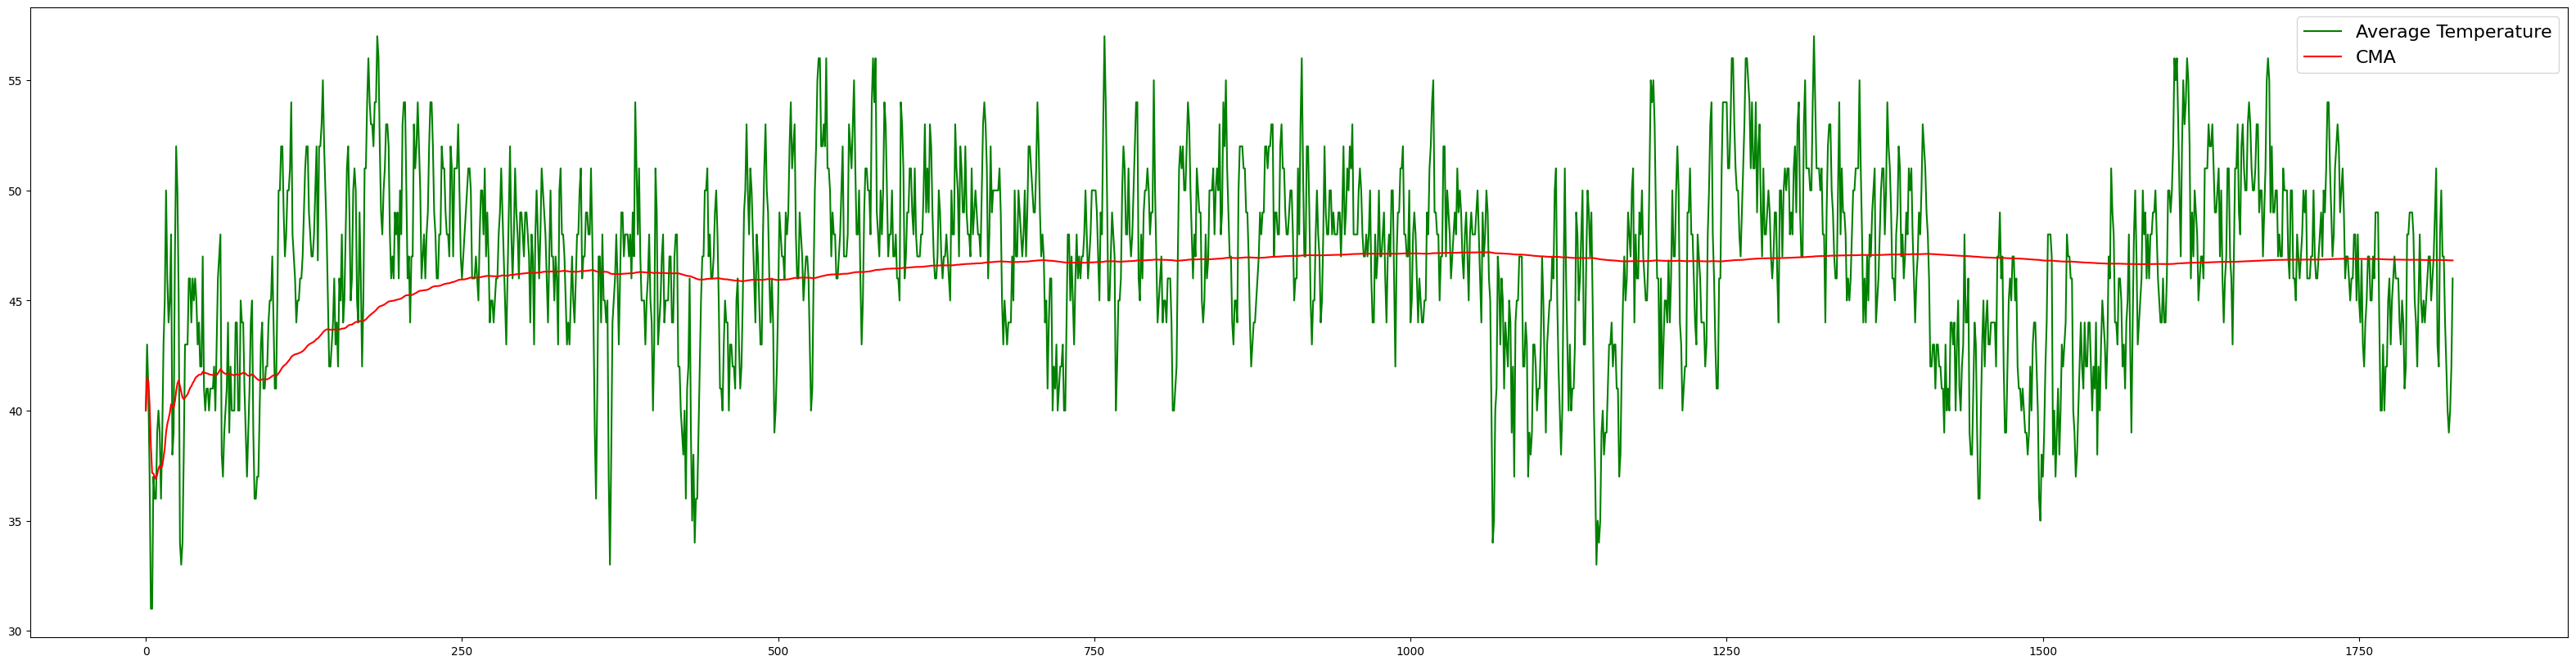

In [38]:
color = ["green", "red"]
df[["AvgTemp", "CMA"]].plot(color = color, figsize = (40, 10))
plt.legend(labels = ["Average Temperature", "CMA"], fontsize = 16)

# EWMA
* EWMA is used to identify trends and filter out noise. The weights of element is decreased gradually over time. It gives weight to recent data points. not historical ones.
*  Alpha is smoothing factor.
* It has value between 0 and 1.


In [47]:
df["EWMA_0.1"] = df.AvgTemp.ewm(alpha = 0.1, adjust = False).mean()
df["EWMA_0.3"] = df.AvgTemp.ewm(alpha = 0.3, adjust = False).mean()
df

,DATE,AvgTemp,SMA10,SMA20,CMA,EWMA_0.1,EWMA_0.3
0,1/1/2014,40.0,40.000000,40.000000,40.000000,40.000000,40.000000
1,1/2/2014,43.0,41.500000,41.500000,41.500000,40.300000,40.900000
2,1/3/2014,41.0,41.333333,41.333333,41.333333,40.370000,40.930000
3,1/4/2014,37.0,40.250000,40.250000,40.250000,40.033000,39.751000
4,1/5/2014,31.0,38.400000,38.400000,38.400000,39.129700,37.125700
...,...,...,...,...,...,...,...
1820,12/26/2018,40.0,45.400000,45.750000,46.829915,45.258943,43.452206
1821,12/27/2018,39.0,44.200000,45.450000,46.825618,44.633049,42.116544
1822,12/28/2018,40.0,43.900000,45.250000,46.821873,44.169744,41.481581
1823,12/29/2018,42.0,43.900000,45.100000,46.819230,43.952769,41.637107


<AxesSubplot: >

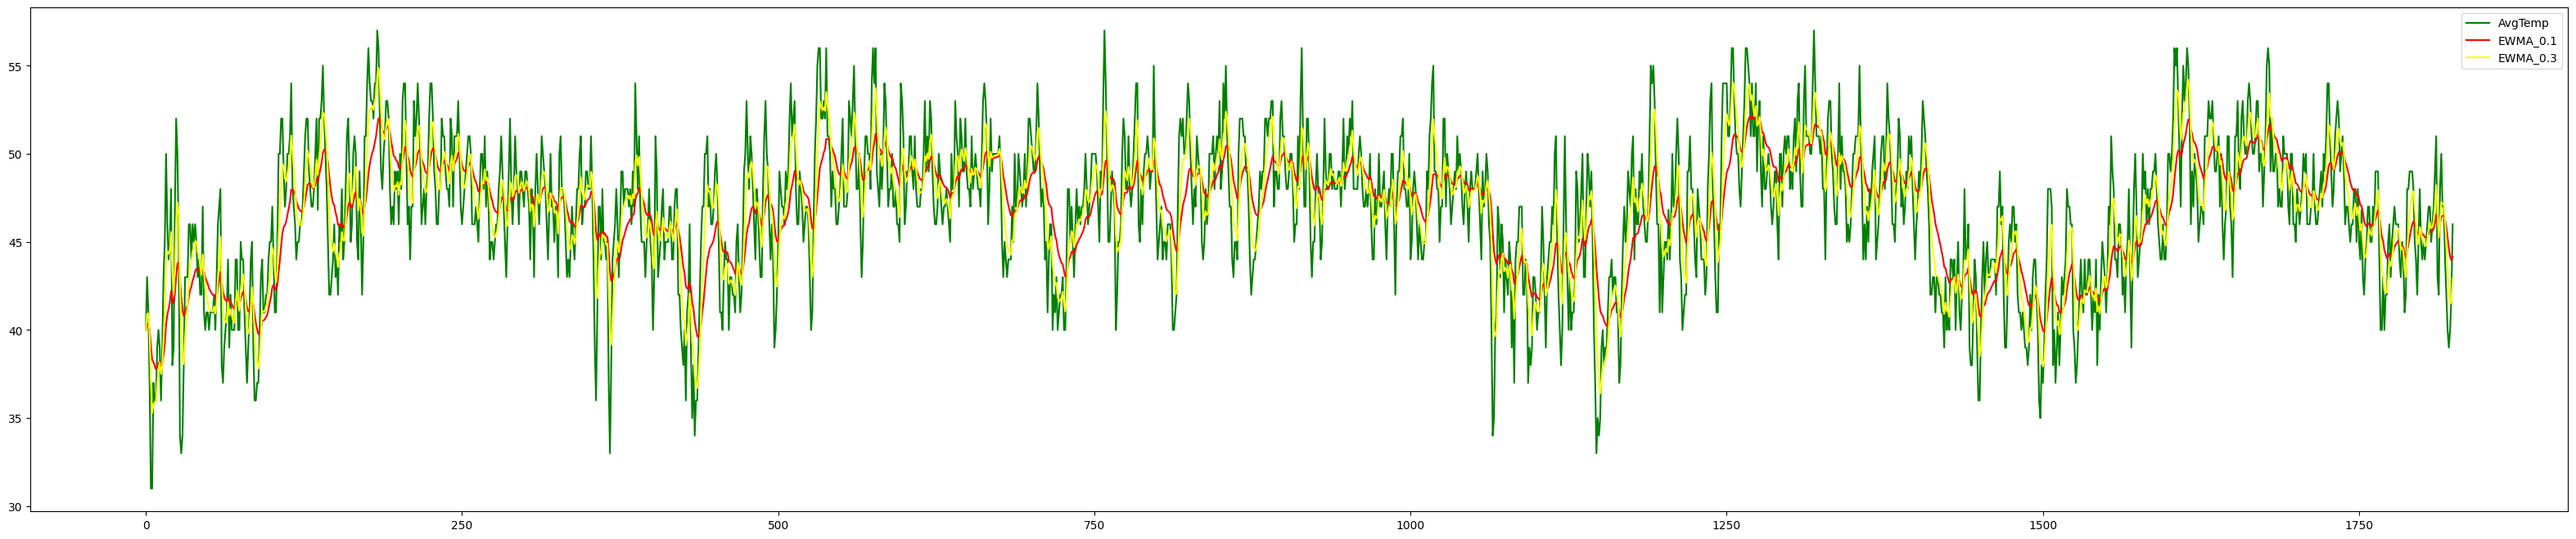

In [52]:
colors = ["green", "red", "yellow"]
df[["AvgTemp", "EWMA_0.1", "EWMA_0.3"]].plot(color = colors, figsize = (40, 8))


In [42]:
df

,DATE,AvgTemp,SMA10,SMA20,CMA
0,1/1/2014,40.0,40.000000,40.000000,40.000000
1,1/2/2014,43.0,41.500000,41.500000,41.500000
2,1/3/2014,41.0,41.333333,41.333333,41.333333
3,1/4/2014,37.0,40.250000,40.250000,40.250000
4,1/5/2014,31.0,38.400000,38.400000,38.400000
...,...,...,...,...,...
1820,12/26/2018,40.0,45.400000,45.750000,46.829915
1821,12/27/2018,39.0,44.200000,45.450000,46.825618
1822,12/28/2018,40.0,43.900000,45.250000,46.821873
1823,12/29/2018,42.0,43.900000,45.100000,46.819230


## Auto Correlation Function
* It measures the degree of similarity between a given time series and the lagged version of that time series at various interval we observe.
## Partial Auto Correlation Function
* It always shows the correlation of the sequence with itself with some number of time units per sequence order in which only the direct effect has been shown, and all other intermediary effects are removed from the given time series.

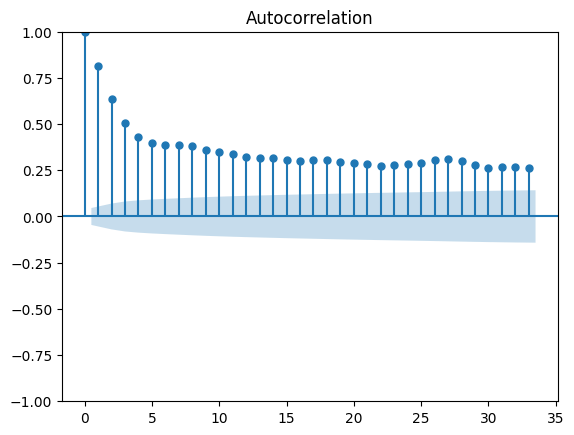

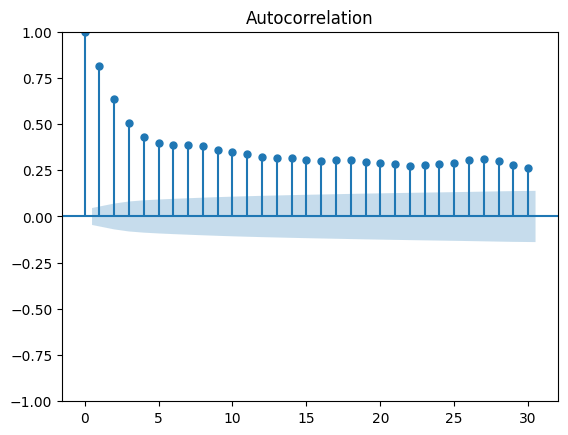

In [76]:
plot_acf(df["AvgTemp"])
plt.show()
plot_acf(df["AvgTemp"], lags = 30)
plt.show()

In [56]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      1825 non-null   object 
 1   AvgTemp   1825 non-null   float64
 2   SMA10     1825 non-null   float64
 3   SMA20     1825 non-null   float64
 4   CMA       1825 non-null   float64
 5   EWMA_0.1  1825 non-null   float64
 6   EWMA_0.3  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [57]:
df['DATE'] = pd.to_datetime(df['DATE'])


In [60]:
df["DATE"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1825 entries, 0 to 1824
Series name: DATE
Non-Null Count  Dtype         
--------------  -----         
1825 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 14.4 KB
